<a href="https://colab.research.google.com/github/jaishruti/Influence-Maximization/blob/main/Influence_Maximization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reading dataset and forming graph

Number of nodes:  34
Number of edges:  77


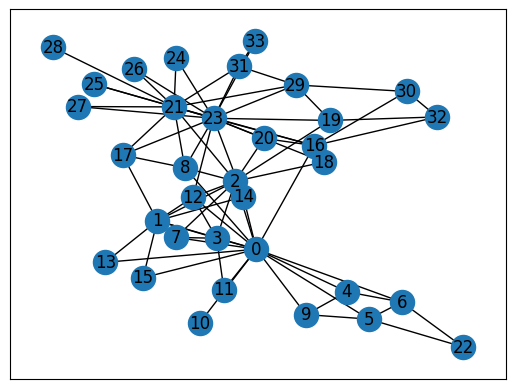

In [73]:
import networkx as nx

#specifying path to edge list file
path_dataset = 'sample_data/testcolab.txt'

#reading edge-list for graph formation
graph = nx.read_edgelist(path_dataset, create_using = nx.Graph(), nodetype=str)

count_nodes = graph.number_of_nodes()
count_edges = graph.number_of_edges()
#displaying graph info
print("Number of nodes: ", count_nodes)
print("Number of edges: ", count_edges)

#visualising graph
nx.draw_networkx(graph)

#print all nodes of graph

In [74]:
#using list comphrehension
nodes = [node for node in graph.nodes()]

#contains list of nodes
print(nodes)


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33']


#finding degree centrality of each node

In [75]:
#finding degree centrality (neighbours)
def in_degree_centrality(graph):
    N = count_nodes
    centrality = [0] * N
    
    for u in nodes:
        for v in graph.neighbors(u):
            index = int(v)
            centrality[index] += 1
    
    return centrality

#invoking in degree function
degree_centrality = in_degree_centrality(graph)
print(degree_centrality)

[16, 9, 10, 6, 3, 4, 4, 4, 5, 3, 1, 2, 5, 2, 3, 2, 6, 4, 2, 4, 3, 12, 2, 16, 2, 2, 2, 2, 1, 5, 3, 4, 3, 2]


#Finding shortest path using BFS from node u to v

In [76]:
from collections import deque

def bfs_shortest_path(graph, start, end):
    # Create an empty queue and visited set
    queue = deque([str(start)])
    visited = set([str(start)])
    # Create a dictionary to keep track of the node from which each node is reached
    parents = {start: None}

    # print("Start: ",start," End: ",end)

    # BFS algorithm
    while queue:
        # print("Queue: ", queue)
        node = queue.popleft()

        if node == end:
            # print("\n End is found: ")
            # Reconstruct the shortest path from the end node to the start node
            path = []
            while node:
                path.append(node)
                node = parents[node]

            # path.reverse()
            return path
        for neighbor in graph.neighbors(str(node)):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                parents[neighbor] = node
        # print("visited: ",visited,"\nParents: ", parents)

    # If the end node is not found, return None
    return None

#u->x->y->..->v means through how many nodes the info has to pass to reach 0 from 33
# shortest_path = bfs_shortest_path(graph, '0', '33')
# print("shortest_path : ",shortest_path)


#Finding betweeness centrality: 
how many times each node appears in shortest-path from node u to node v

In [77]:
def betweeness_centrality(graph):
  centrality = [0]*count_nodes
  # for node in nodes:
  countShortestPath = 0
  #constrct shortest paths for every node pair
  for u in nodes:
    for v in nodes:
      start = str(u)
      end = str(v)
      if start == end:
        continue
        
      #find shortest path from u to v
      path = bfs_shortest_path(graph, start, end)
      if path:
        countShortestPath = countShortestPath + 1

      #incrementing betweeness centrality value for all path 
      #nodes except start and end
      for i in path:
        if i != start and i != end:
          node = int(i)
          centrality[node] = centrality[node] + 1

  #     print("Path from ", start,"to ",end," is ",path)
  # print("Number of shortest paths: ", countShortestPath)
  return centrality,countShortestPath

betweenessCentrality,countShortestPath = betweeness_centrality(graph)

print("Betweeness Centrality of each node: ")
for i in range(count_nodes):
  betweenessCentrality[i] = betweenessCentrality[i]/countShortestPath
  print(f"Node {i}: {betweenessCentrality[i]}")
  

Betweeness Centrality of each node: 
Node 0: 0.4732620320855615
Node 1: 0.026737967914438502
Node 2: 0.28342245989304815
Node 3: 0.0
Node 4: 0.0
Node 5: 0.053475935828877004
Node 6: 0.0017825311942959
Node 7: 0.0
Node 8: 0.040998217468805706
Node 9: 0.0
Node 10: 0.0
Node 11: 0.0
Node 12: 0.0071301247771836
Node 13: 0.0
Node 14: 0.0
Node 15: 0.0
Node 16: 0.07040998217468805
Node 17: 0.0
Node 18: 0.0
Node 19: 0.0338680926916221
Node 20: 0.0
Node 21: 0.2549019607843137
Node 22: 0.0
Node 23: 0.12121212121212122
Node 24: 0.0
Node 25: 0.0
Node 26: 0.0
Node 27: 0.0
Node 28: 0.0
Node 29: 0.0285204991087344
Node 30: 0.0142602495543672
Node 31: 0.008912655971479501
Node 32: 0.0017825311942959
Node 33: 0.0


#using predefined function: betweeness centrality

In [78]:
# Compute the betweenness centrality of nodes in the graph
betweenness = nx.betweenness_centrality(graph)

# Print the betweenness centrality of each node
for node, centrality in betweenness.items():
    print(f"Node {node}: {centrality}")

Node 0: 0.43764580327080344
Node 1: 0.053873556998557
Node 2: 0.1522637085137085
Node 3: 0.01196188071188071
Node 4: 0.0006313131313131313
Node 5: 0.02998737373737374
Node 6: 0.029987373737373736
Node 7: 0.0
Node 8: 0.056737012987012996
Node 9: 0.0006313131313131313
Node 10: 0.0
Node 11: 0.0
Node 12: 0.04159151034151034
Node 13: 0.0
Node 14: 0.02936056998556999
Node 15: 0.0
Node 16: 0.14034842472342476
Node 17: 0.014727633477633473
Node 18: 0.0008477633477633478
Node 19: 0.021702140452140455
Node 20: 0.0017947330447330447
Node 21: 0.18215788840788844
Node 22: 0.0
Node 23: 0.2750556156806156
Node 24: 0.0
Node 25: 0.0
Node 26: 0.0
Node 27: 0.0
Node 28: 0.0
Node 29: 0.01824494949494949
Node 30: 0.0038404882154882162
Node 31: 0.0038690476190476187
Node 32: 0.0022095959595959595
Node 33: 0.0


#Extracting 3 highest betweness centrality nodes

In [79]:
def find_top_k_nodes(k):

  # Sort the dictionary by value in descending order
  sorted_dict = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

  # Extract the top k elements using slicing
  top_k = dict(sorted_dict[:k])

  return top_k

In [80]:
def get_seed_nodes(k):
  seed_nodes = []
  top_k = find_top_k_nodes(k)
  for ele in top_k.items():
    seed_nodes.append(ele[0])

  return seed_nodes

seedSet = get_seed_nodes(3);
print(seedSet)

['0', '23', '21']


#Simulating using Idependence cascade model for influennce spread

In [81]:
import random
INITIAL_PROB = 0.5

activation_prob = {}

#setting activation probablity to 0.5 for all nodes
def set_initial_prob():
  for i in nodes:
    activation_prob[i] = INITIAL_PROB
  print(activation_prob)

def independence_cascade_model(seed_set_size):
  set_initial_prob()
  seed_nodes = get_seed_nodes(seed_set_size)

  activated_nodes = set(seed_nodes)
  next_nodes = set(seed_nodes)

  while next_nodes:
    new_nodes = set()

    #unactivated neighbors for each node in next_nodes
    for node in next_nodes:
      unactivated_neighbors = set(graph.neighbors(node)) - activated_nodes
      # print("unactivated_neighbors ",node,": ",unactivated_neighbors)

      for neighbor in unactivated_neighbors:
        act_prob = activation_prob[neighbor]
        activated_neighbors = activated_nodes.intersection(graph.neighbors(neighbor))
        prob = 1
        #calculate probability of the neighbor based on probablity of activated neighbors it follows
        for act_nb in activated_neighbors:
          prob = prob * (1 - activation_prob[act_nb])
        prob = prob * act_prob

        #check a random number if it is less than prob then activated that node
        if random.random() <= prob:
          new_nodes.add(neighbor)
          activated_nodes.add(neighbor)
    #set next nodes to set of new nodes neighbors to be activated
    next_nodes = new_nodes
    return activated_nodes, seed_nodes

def simulate():
  for seed_set_size in range(1,10): 
    activatedNodes, seedNodes = independence_cascade_model(seed_set_size)
    influence = len(activatedNodes)
    dict_seedsize_influenced[len(seedNodes)] = activatedNodes

    print("influenced: ",influence,"nodes \nactivated nodes: ",activatedNodes,"\nSeed node set: ",seedNodes)
    #for plotting
    num_of_seed_nodes.append(seed_set_size)
    num_of_influenced_nodes.append(len(activatedNodes))
    

#executing ICM
num_of_seed_nodes = []
num_of_influenced_nodes = []
dict_seedsize_influenced = {} 

simulate()
print(dict_seedsize_influenced)



{'0': 0.5, '1': 0.5, '2': 0.5, '3': 0.5, '4': 0.5, '5': 0.5, '6': 0.5, '7': 0.5, '8': 0.5, '9': 0.5, '10': 0.5, '11': 0.5, '12': 0.5, '13': 0.5, '14': 0.5, '15': 0.5, '16': 0.5, '17': 0.5, '18': 0.5, '19': 0.5, '20': 0.5, '21': 0.5, '22': 0.5, '23': 0.5, '24': 0.5, '25': 0.5, '26': 0.5, '27': 0.5, '28': 0.5, '29': 0.5, '30': 0.5, '31': 0.5, '32': 0.5, '33': 0.5}
influenced:  6 nodes 
activated nodes:  {'9', '14', '10', '8', '0', '5'} 
Seed node set:  ['0']
{'0': 0.5, '1': 0.5, '2': 0.5, '3': 0.5, '4': 0.5, '5': 0.5, '6': 0.5, '7': 0.5, '8': 0.5, '9': 0.5, '10': 0.5, '11': 0.5, '12': 0.5, '13': 0.5, '14': 0.5, '15': 0.5, '16': 0.5, '17': 0.5, '18': 0.5, '19': 0.5, '20': 0.5, '21': 0.5, '22': 0.5, '23': 0.5, '24': 0.5, '25': 0.5, '26': 0.5, '27': 0.5, '28': 0.5, '29': 0.5, '30': 0.5, '31': 0.5, '32': 0.5, '33': 0.5}
influenced:  4 nodes 
activated nodes:  {'15', '0', '23', '8'} 
Seed node set:  ['0', '23']
{'0': 0.5, '1': 0.5, '2': 0.5, '3': 0.5, '4': 0.5, '5': 0.5, '6': 0.5, '7': 0.5, '

#plotting graph

num_of_seed_nodes:  [1, 2, 3, 4, 5, 6, 7, 8, 9] 
num_of_influenced_nodes:  [6, 4, 11, 13, 12, 10, 12, 10, 17]


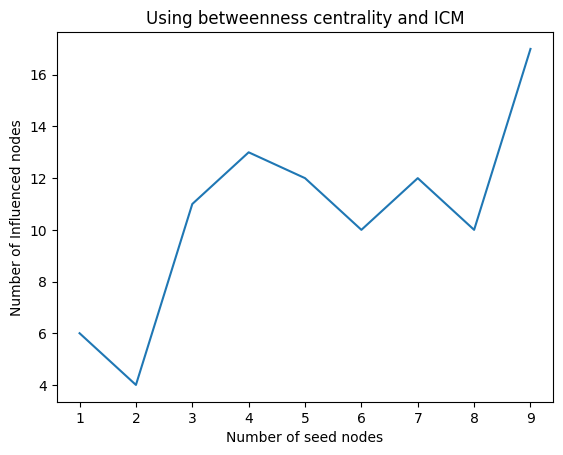

In [82]:
import matplotlib.pyplot as plt
import numpy as np

print("num_of_seed_nodes: ",num_of_seed_nodes,"\nnum_of_influenced_nodes: ",num_of_influenced_nodes)
x = np.array(num_of_seed_nodes)
y = np.array(num_of_influenced_nodes)

plt.plot(x,y)

plt.title("Using betweenness centrality and ICM")
plt.xlabel("Number of seed nodes")
plt.ylabel("Number of Influenced nodes")
plt.show()
 

dict_items([(1, {'9', '14', '10', '8', '0', '5'}), (2, {'15', '0', '23', '8'}), (3, {'18', '9', '14', '10', '29', '23', '21', '28', '6', '15', '0'}), (4, {'25', '2', '4', '10', '23', '21', '3', '31', '17', '28', '7', '15', '0'}), (5, {'2', '4', '14', '10', '16', '23', '21', '28', '7', '18', '24', '0'}), (6, {'2', '9', '32', '16', '23', '21', '8', '15', '0', '13'}), (7, {'2', '9', '32', '16', '23', '21', '8', '3', '1', '31', '26', '0'}), (8, {'2', '16', '23', '21', '8', '1', '12', '28', '0', '11'}), (9, {'25', '2', '4', '10', '29', '16', '23', '21', '8', '3', '1', '19', '12', '24', '27', '0', '5'})])
Influenced nodes: [2, 16, 23, 21, 8, 1, 12, 28, 0, 11] length:  10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33']


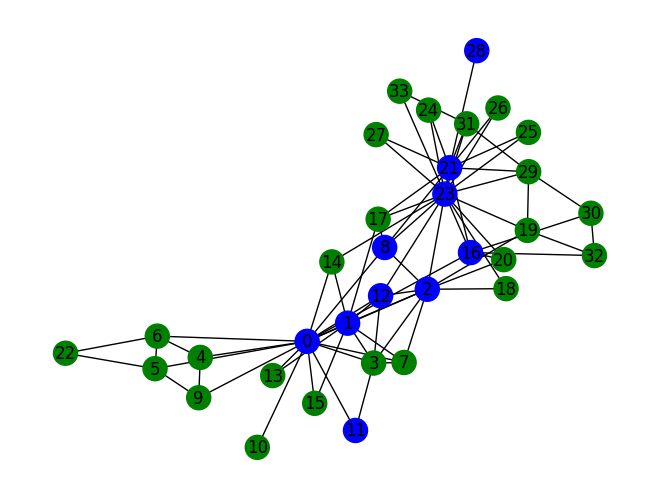

In [83]:
print(dict_seedsize_influenced.items())

listOfMaxActivatedNodes = dict_seedsize_influenced[8];
list=[]
for i in listOfMaxActivatedNodes:
  list.append(int(i))
print("Influenced nodes:" ,list ,"length: ", len(list))
color_map = []

print(graph.nodes())
for node in graph.nodes():
    if node in listOfMaxActivatedNodes:
        color_map.append('blue')
    else: 
        color_map.append('green')  
nx.draw(graph, node_color = color_map, with_labels = True)


#OneHop HD/BC : SEED SET Formation
N=20
Result: matrix of N x s(seed set size)

Procedure: Repeat N
1. select 15% random nodes from network as R
2. Take any one neighbour of each node in R and form RN
3. Take top s highest degree nodes from RN as seed nodes

Assumptions: s is a seed set size, which is 10% of the total nodes in the network




In [84]:
import random
num_of_nodes = graph.number_of_nodes()
# print("Total nodes: ", num_of_nodes)

#s
seed_percent = 0.10
seed_set_size = round(seed_percent * num_of_nodes)
# print("Seed set size: ", seed_set_size)

#repeat the seed set formation N times
N = 20
percent_of_random_nodes = 0.15

def OneHop(high_degree, between_cent):
  list_of_seed_nodes = []
  # size_of_random_nodes_for_seed_selection
  random_nodes_size = round(percent_of_random_nodes * num_of_nodes)
  print("random_nodes_size: ", random_nodes_size)

  for i in range(N):
    print("\n----------Iteration ", i,"--------------")
    list_of_neighbor = []
    #randomly select 15% of nodes
    random_nodes = random.sample(nodes, random_nodes_size)

    print(random_nodes)
    
    #selcting random one neighbour of each node in Random_nodes(R)
    for j in random_nodes:
      l=[]
      for n in graph.neighbors(str(j)):
        l.append(n)
      
      #neighbors of j
      print("neighbours of ", j, ": ", l  )
      
      #select randomly 1 neighbor of j 
      random_neighbor = random.choice(l)

      #add it to list of neighbors
      list_of_neighbor.append(random_neighbor)

    print("list of selected 1 random neighbor: ", list_of_neighbor,"\n")

    #degree centrality of selected neighbors
    # dict->key(node), value(degree)
    dict_nodes = {}
    for i in list_of_neighbor:
      if between_cent == 1:
        dict_nodes[i] = betweenness[i]
      if high_degree == 1:
        dict_nodes[i] = degree_centrality[int(i)]
    # print("Neighbor nodes with their degree: ", dict_nodes)

    #get s highest degree nodes from neighbours
    # Sort the dictionary by value in descending order
    sorted_dict = sorted(dict_nodes.items(), key=lambda x: x[1], reverse=True)

    # Extract the top k elements using slicing
    top_k = sorted_dict[:seed_set_size]
    print("Seed set ", i,": ", top_k)

    #seed set 
    seed_set = []
    for k in top_k:
      seed_set.append(k[0])
    print("seed_set: ", seed_set)

    #add it to matrix Nxs
    list_of_seed_nodes.append(seed_set)

  print("20 x S seed node list: ", list_of_seed_nodes)
  return list_of_seed_nodes
   
print("\n---------------------------------------------------FOR OneHopHD:----------------------------------------------------------------------")
list_seed_nodes_HD = OneHop(1,0)
print("\n---------------------------------------------------FOR OneHopBC:----------------------------------------------------------------------")
list_seed_nodes_BC = OneHop(0,1)




---------------------------------------------------FOR OneHopHD:----------------------------------------------------------------------
random_nodes_size:  5

----------Iteration  0 --------------
['1', '10', '21', '4', '18']
neighbours of  1 :  ['0', '2', '3', '7', '12', '13', '14', '15', '17']
neighbours of  10 :  ['0']
neighbours of  21 :  ['2', '8', '24', '25', '26', '27', '28', '29', '31', '17', '16', '23']
neighbours of  4 :  ['0', '6', '9']
neighbours of  18 :  ['2', '23']
list of selected 1 random neighbor:  ['7', '0', '28', '6', '2'] 

Seed set  2 :  [('0', 16), ('2', 10), ('7', 4)]
seed_set:  ['0', '2', '7']

----------Iteration  1 --------------
['28', '0', '24', '7', '23']
neighbours of  28 :  ['21']
neighbours of  0 :  ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']
neighbours of  24 :  ['21', '23']
neighbours of  7 :  ['0', '1', '2', '3']
neighbours of  23 :  ['8', '18', '12', '24', '25', '26', '14', '27', '29', '33', '19', '20', '3

#Threshold based diffusion model
1. Each node is assigned with a threshold θ and a starting state value of 0

Repeat until the number of activated nodes at time step t equals time step t-1:-
2. Calculate weighted state value of every node wi = (no. of activated connections of node i at t)/(total connections)
3. if wi >  θ , change state of node i to 1, vi
4. if no. of activated nodes is same as in prev step then calculated the total activated nodes and final activated fraction af(t) = sum of vi / total nodes
add af to af list

Repeat the above steps for kth row of N




In [85]:

def diffusion_threshold_model(threshold, list_of_seed_nodes):
  #access all N seed list
  # threshold = 0.5
  c=0
  activation_fraction=[]
  for i in list_of_seed_nodes:
    c+=1
    print("\n-----Iter ",c,"-----")
    # print(num_of_nodes)
    state = [0]*num_of_nodes
    weighted_value = [threshold]*num_of_nodes

    #change state of seed nodes in i
    for n in i:
      state[int(n)] = 1
    print(state)

    #to track num of activated nodes 
    count_activated_nodes = state.count(1)
    prev_count_activated_nodes = 0

    #diffusion threshold model
    t=0
    while prev_count_activated_nodes !=  count_activated_nodes:
      t+=1
      # print("hi")
      print("--------",t,"-------")

      prev_count_activated_nodes = count_activated_nodes

      for node in graph.nodes():

        #execute if state of node is 0
        if state[int(node)] != 1:
          count_active_neighbors = 0 
          count_neighbors = 0

          #count active neighbors

          for n in graph.neighbors(node):
            if state[int(n)] == 1:
              count_active_neighbors += 1
            count_neighbors += 1
          
          #calculate weighted value
          weighted_value[int(node)] = count_active_neighbors / count_neighbors
          # print(f'weighted value of {node}: {weighted_value[int(node)]}')

          if weighted_value[int(node)] >= threshold:
            state[int(node)] = 1

      count_activated_nodes = state.count(1)  
      print("State list: ",state)
      print("count activated nodes: ", count_activated_nodes)
    af = state.count(1) / num_of_nodes
    activation_fraction.append(af)
    print("Activation fraction: ",af)  
    
  #call plot function
  return(activation_fraction)

print("\n---------------------------------------------------FOR OneHopHD:----------------------------------------------------------------------")
activation_fraction_list_HD = diffusion_threshold_model(0.5, list_seed_nodes_HD)
print("\n---------------------------------------------------FOR OneHopBC:----------------------------------------------------------------------")
activation_fraction_list_BC = diffusion_threshold_model(0.5, list_seed_nodes_BC)



---------------------------------------------------FOR OneHopHD:----------------------------------------------------------------------

-----Iter  1 -----
[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-------- 1 -------
State list:  [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
count activated nodes:  10
-------- 2 -------
State list:  [1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
count activated nodes:  12
-------- 3 -------
State list:  [1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
count activated nodes:  12
Activation fraction:  0.35294117647058826

-----Iter  2 -----
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-------- 1 -------
State list:  [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 

#plot activation fraction vs index of seed set list

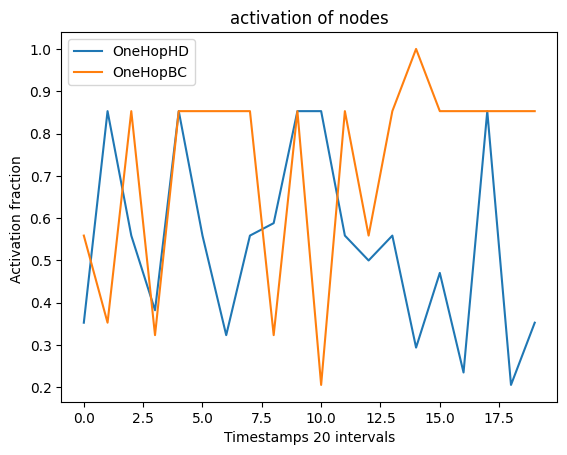

In [86]:
import matplotlib.pyplot as plt
import numpy as np

def plotting_graph(af_hd, af_bc):
  x = np.arange(0, 20, 1)
  y = np.array(af_hd)
  z = np.array(af_bc)

  plt.plot(x,y,label="OneHopHD")
  plt.plot(x,z,label="OneHopBC")

  plt.title("activation of nodes")
  plt.xlabel(f"Timestamps {N} intervals")
  plt.ylabel("Activation fraction ")

  plt.legend()
  plt.show()

plotting_graph(activation_fraction_list_HD, activation_fraction_list_BC)
